In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.read_excel

In [2]:
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


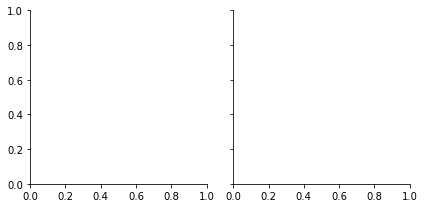

In [3]:
g = sns.FacetGrid(tips,col='time')

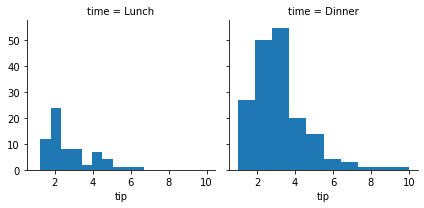

In [4]:
g = sns.FacetGrid(tips,col='time')
g.map(plt.hist,'tip');

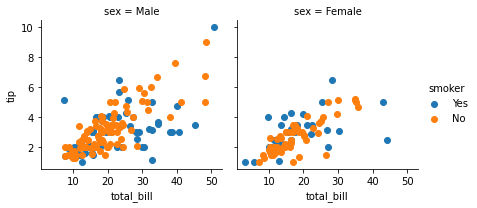

In [5]:
g = sns.FacetGrid(tips,col='sex',hue='smoker')
g.map(plt.scatter,'total_bill','tip')
g.add_legend();

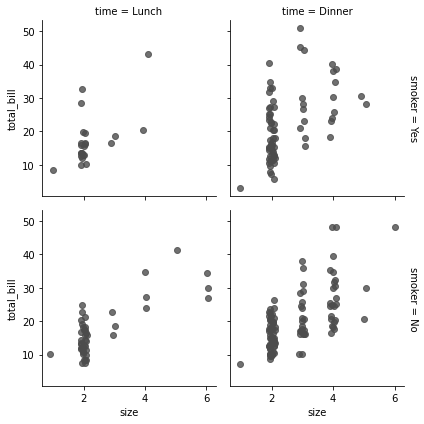

In [6]:
g = sns.FacetGrid(tips,row='smoker',col='time',margin_titles=True)
g.map(sns.regplot,'size','total_bill',color='.3',fit_reg=False,x_jitter = .1);

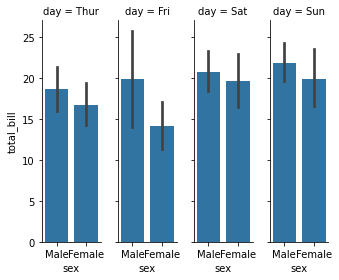

In [7]:
g = sns.FacetGrid(tips,height=4,col='day',aspect=.3)
g.map(sns.barplot,"sex",'total_bill')


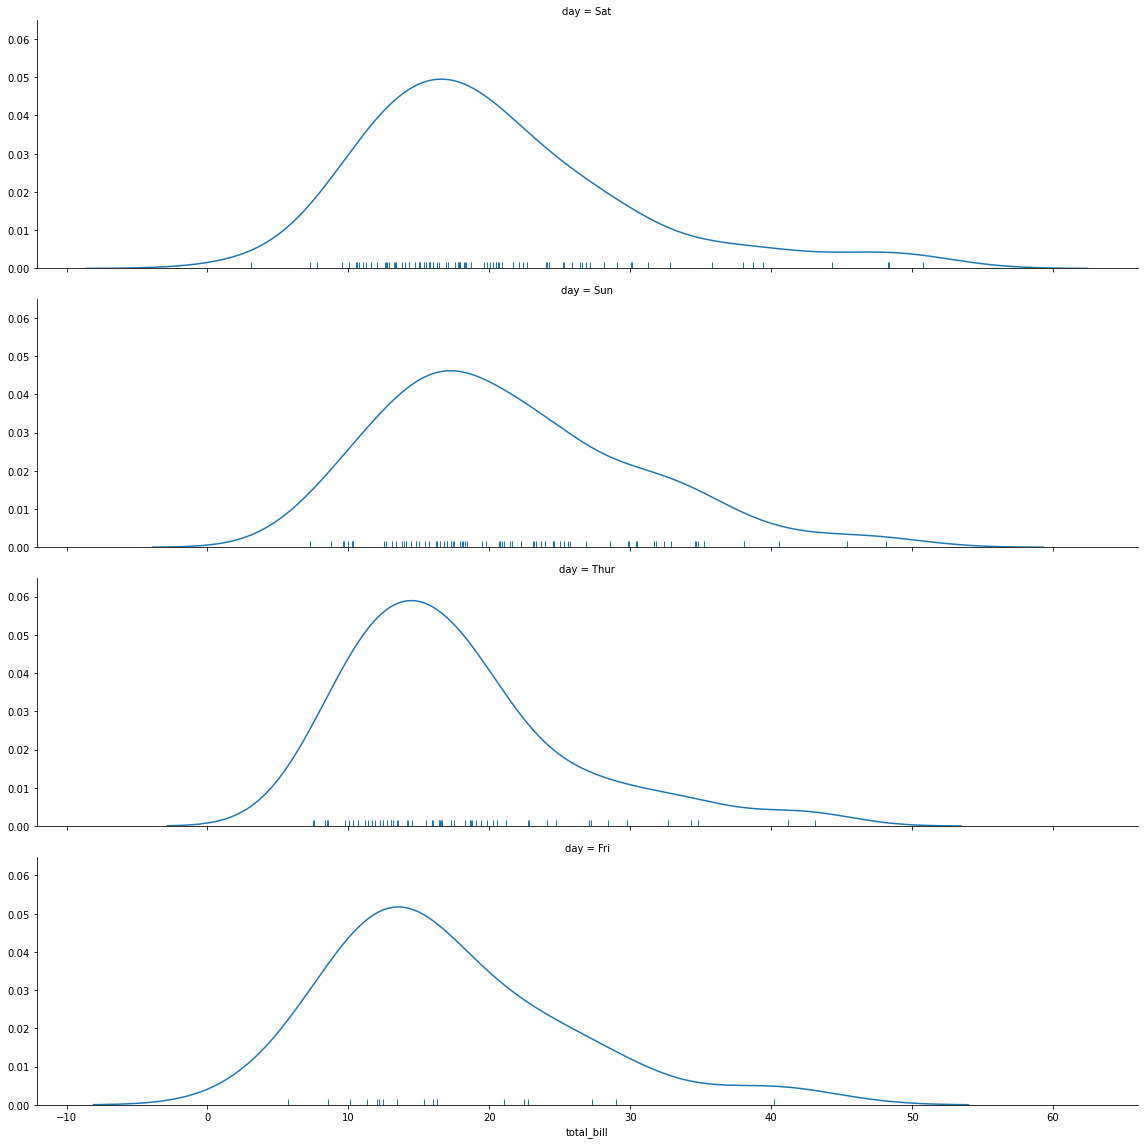

In [8]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips,height=4,row='day',row_order = ordered_days,aspect=4)
g.map(sns.distplot,'total_bill',hist=False,rug= True);

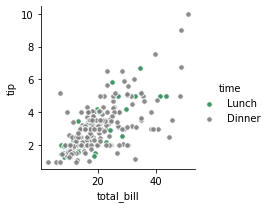

In [9]:
pal = dict(Lunch='seagreen',Dinner='gray')
g = sns.FacetGrid(tips,hue='time',palette=pal)
g.map(plt.scatter,'total_bill','tip',s=30,alpha=.9,linewidths=.9,edgecolors='white')
g.add_legend()

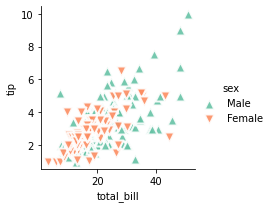

In [10]:
g = sns.FacetGrid(tips,hue='sex',palette='Set2',height=3,hue_kws={'marker':['^','v']})
g.map(plt.scatter,'total_bill','tip',s=100,alpha=.9,linewidths=2,edgecolors='white')
g.add_legend()

In [11]:
attend = sns.load_dataset('attention').query('subject<=12')
attend.head()

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0


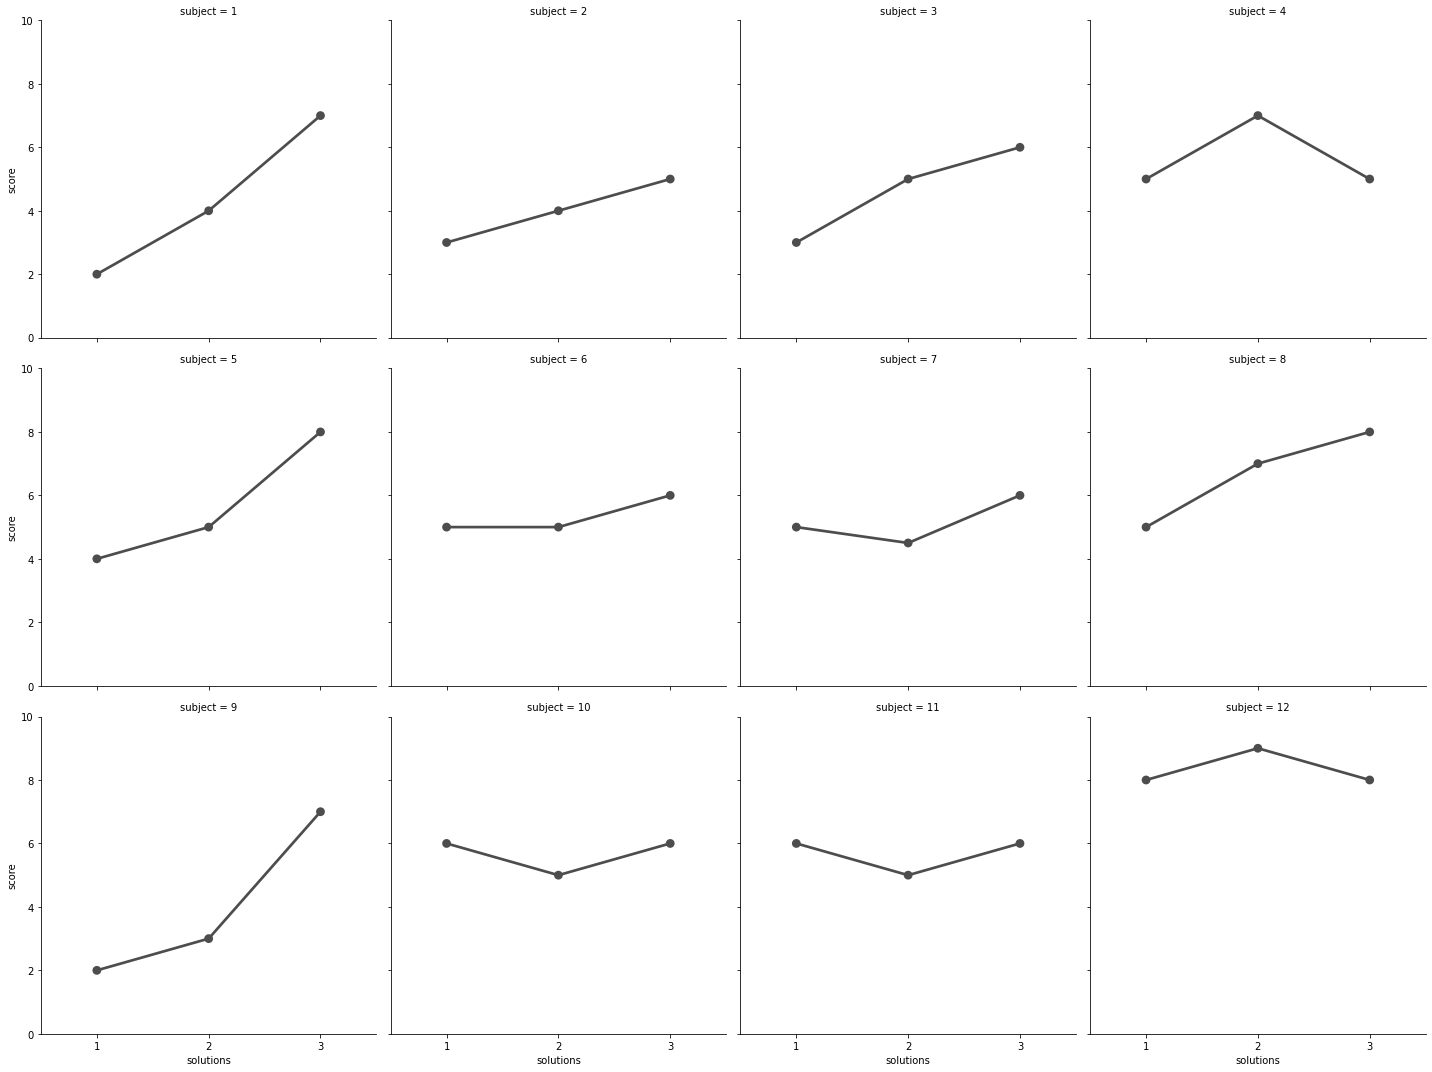

In [12]:

g = sns.FacetGrid(attend,col='subject',col_wrap=4,height=5,ylim=(0,10))
g.map(sns.pointplot,'solutions','score',color='.3',ci='None');


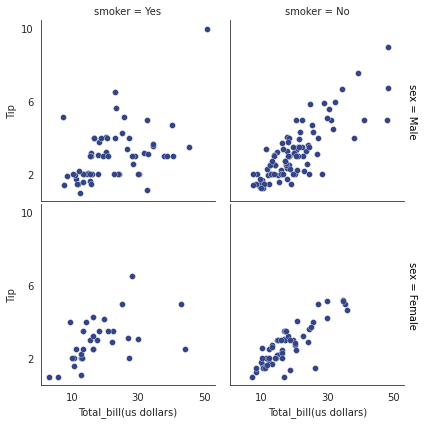

In [13]:
with sns.axes_style('white'):
    g = sns.FacetGrid(tips,row='sex',col='smoker',margin_titles=True)
g.map(plt.scatter,'total_bill','tip',color='#334488',edgecolor='white',lw=.3)
g.set_axis_labels('Total_bill(us dollars)','Tip')
g.set(xticks=[10,30,50],yticks=[2,6,10])
g.fig.subplots_adjust(wspace=.09,hspace=.02)

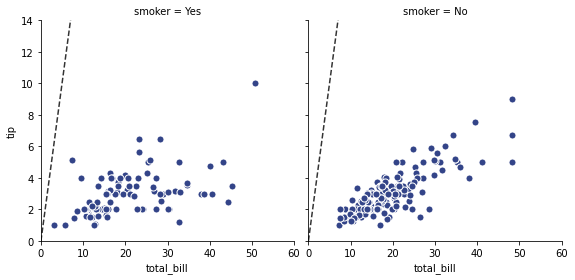

In [14]:
g = sns.FacetGrid(tips,col='smoker',margin_titles=True,height=4)
g.map(plt.scatter,'total_bill','tip',color='#334488',edgecolor='white',s=50,lw=1)
for ax in g.axes.flat:
    ax.plot((0,50),(0,2*50),c='.2',ls='--')
g.set(xlim=(0,60),ylim=(0,14))    

In [15]:
from scipy import stats

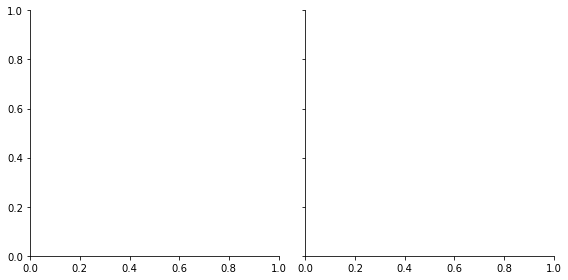

In [16]:
def quantile_plot(x,**kwargs):
    qntls,xr=stats.probplot(x,fit=False)
    plt.scatter(xr,qntls,**kwargs)
    
    
g = sns.FacetGrid(tips,col='sex',height=4) 

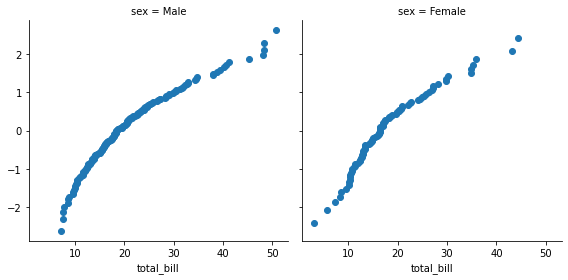

In [17]:
def quantile_plot(x,**kwargs):
    qntls,xr=stats.probplot(x,fit=False)
    plt.scatter(xr,qntls,**kwargs)
    
g = sns.FacetGrid(tips,col='sex',height=4)   
g.map(quantile_plot,'total_bill')

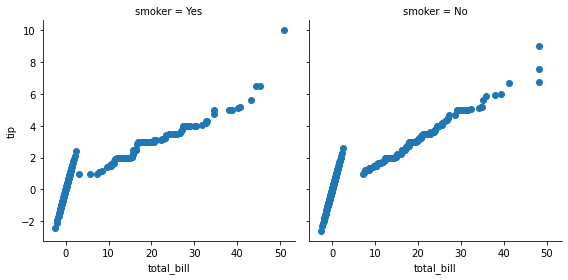

In [18]:
def qqplot(x,y,**kwargs):
    xr=stats.probplot(x,fit=False)
    yr=stats.probplot(y,fit=False)
    plt.scatter(xr,yr,**kwargs)

g = sns.FacetGrid(tips,col='smoker',height=4) 
g.map(qqplot,'total_bill','tip')
        

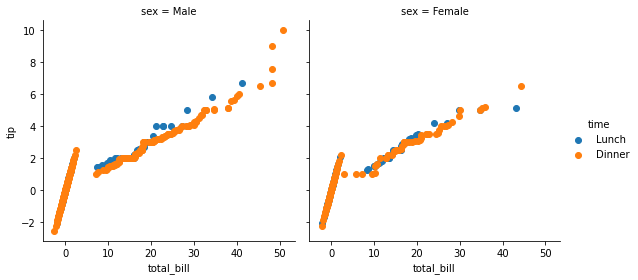

In [19]:
g =sns.FacetGrid(tips,hue='time',col='sex',height=4)
g.map(qqplot,'total_bill','tip')
g.add_legend();
        

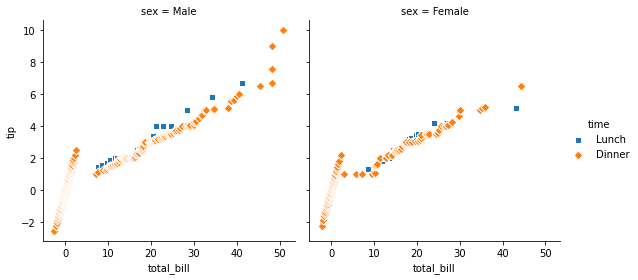

In [20]:
g =sns.FacetGrid(tips,hue='time',col='sex',height=4,hue_kws={'marker':['s','D']})
g.map(qqplot,'total_bill','tip',s=40,edgecolor='w')
g.add_legend()

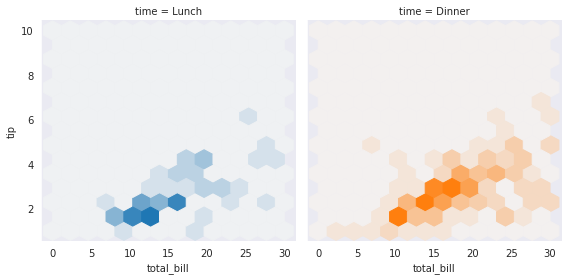

In [21]:
def hexbin(x,y,color,**kwargs):
    cmap=sns.light_palette(color,as_cmap = True)
    plt.hexbin(x,y,gridsize=13,cmap=cmap,**kwargs)
    
    
with sns.axes_style('dark'):
    g =sns.FacetGrid(tips,hue='time',col='time',height=4)
g.map(hexbin,'total_bill','tip',extent=[0,30,1,10]);

In [22]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


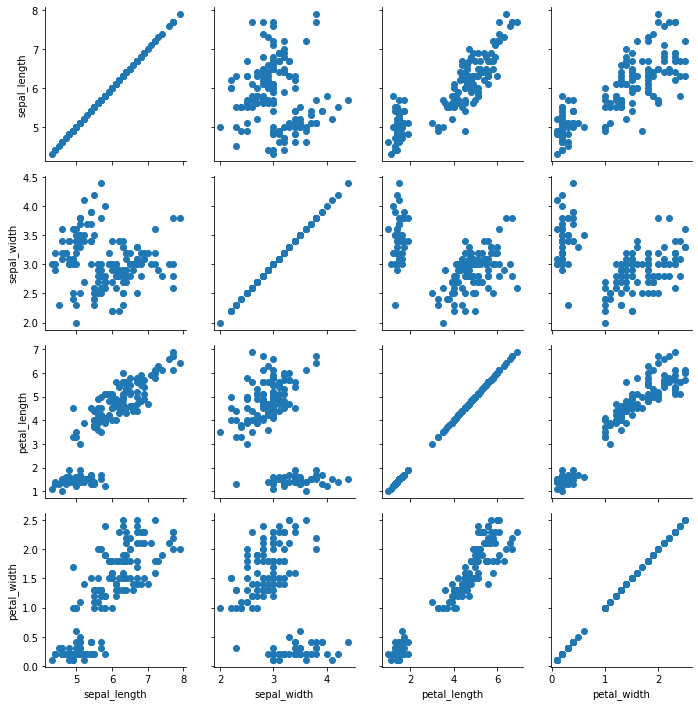

In [23]:
g=sns.PairGrid(iris)
g.map(plt.scatter)


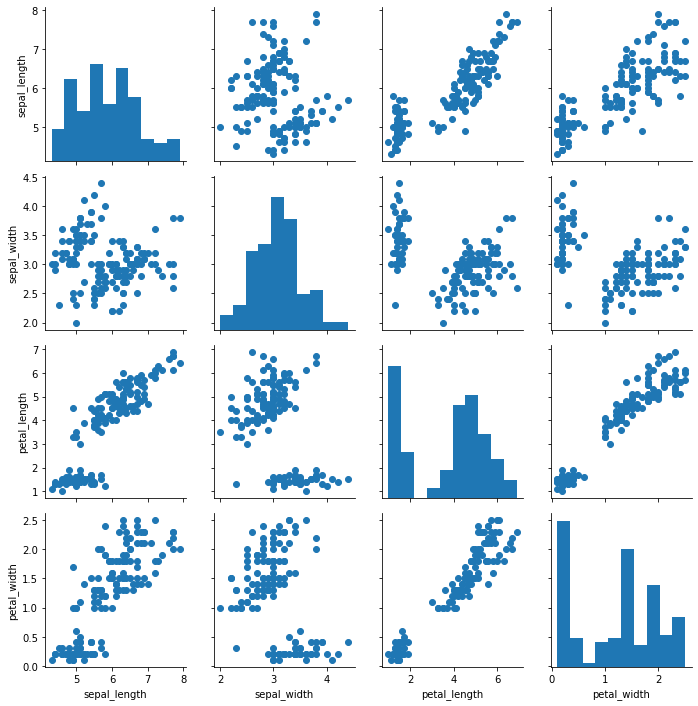

In [24]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


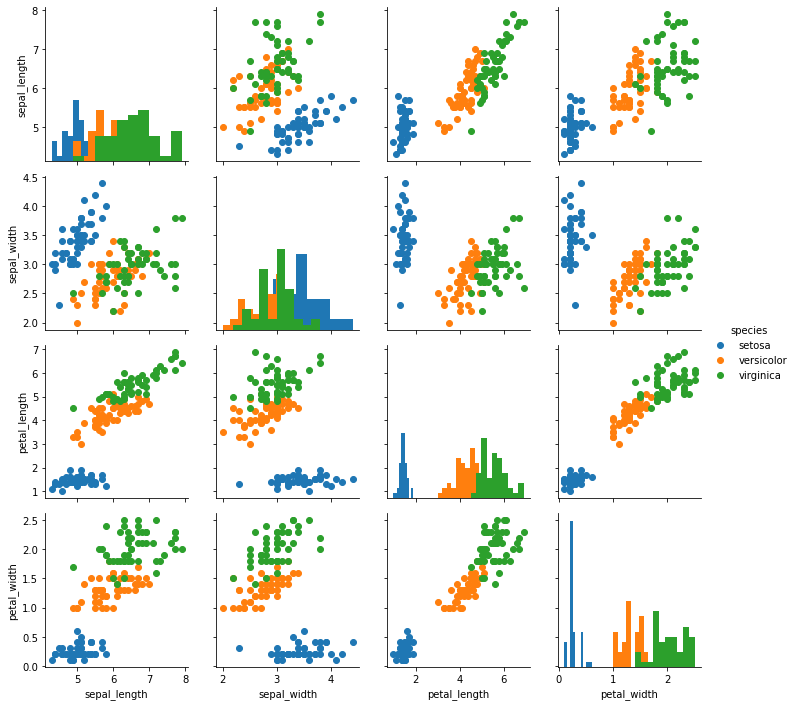

In [25]:
g= sns.PairGrid(iris,hue='species')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

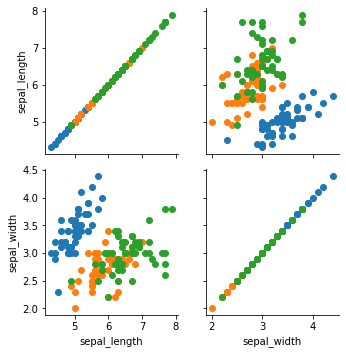

In [26]:
g= sns.PairGrid(iris,vars=['sepal_length','sepal_width'],hue='species')
g.map(plt.scatter);

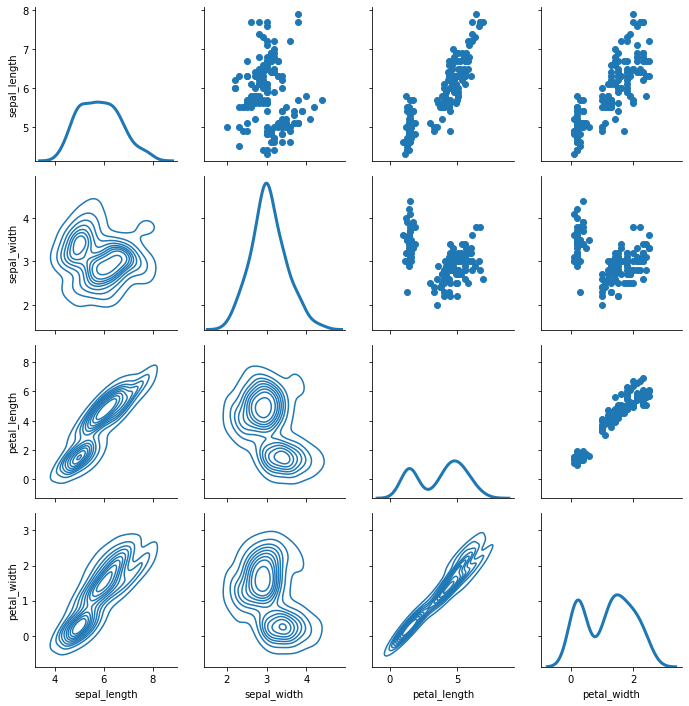

In [27]:
g= sns.PairGrid(iris)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot,lw=3,legend=False);

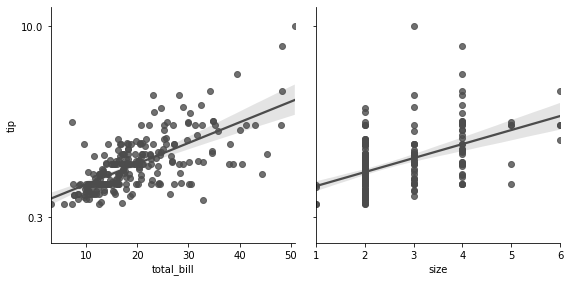

In [28]:
g= sns.PairGrid(tips,y_vars = ['tip'],x_vars=['total_bill','size'],height=4)
g.map(sns.regplot,color='.3')
g.set(ylim=(-1,11),yticks=[0.3,10]);

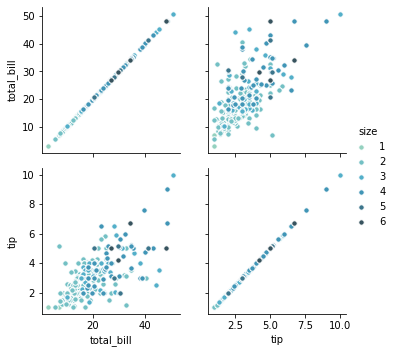

In [29]:
g=sns.PairGrid(tips,hue='size',palette='GnBu_d')
g.map(plt.scatter,s=30,edgecolor='white')
g.add_legend();

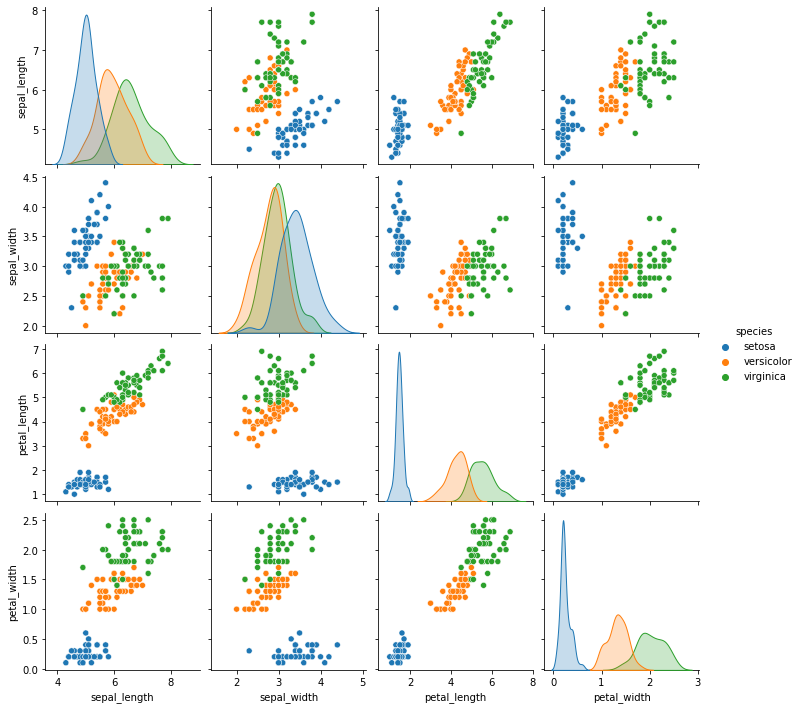

In [30]:
g=sns.pairplot(iris,hue='species',height=2.5)


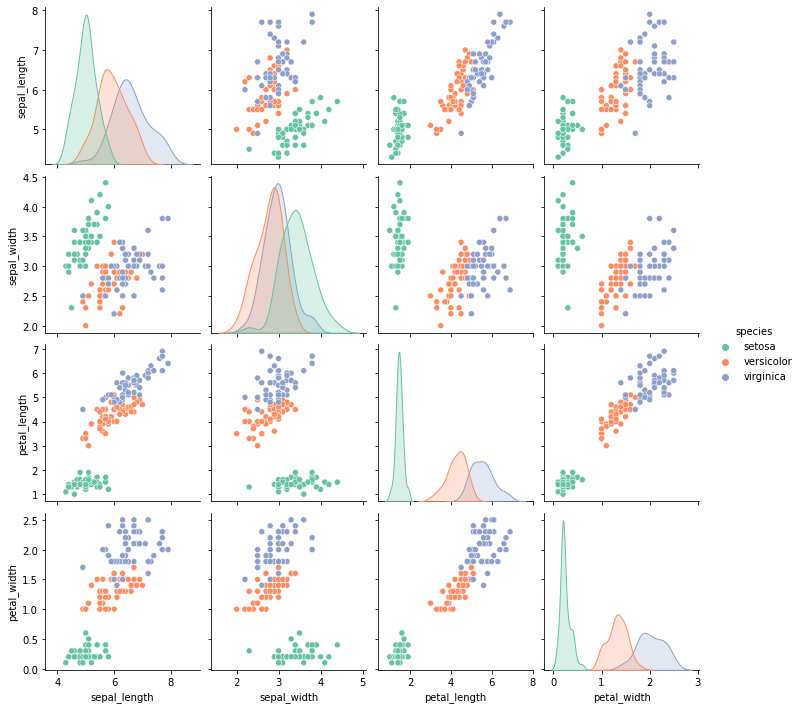

In [31]:
g=sns.pairplot(iris,hue='species',palette='Set2',diag_kind='kde',height=2.5)


In [32]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set(style='darkgrid')

In [33]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


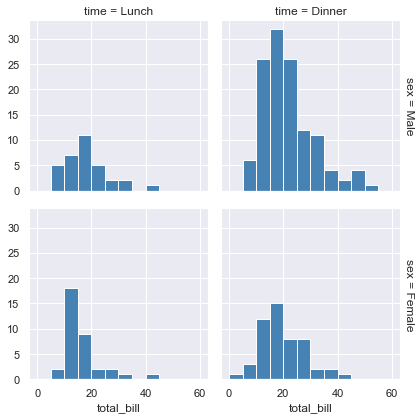

In [34]:
g = sns.FacetGrid(tips,row='sex',col='time',margin_titles=True)
bins = np.linspace(0,60,13)
g.map(plt.hist,'total_bill',color='steelblue',bins=bins);

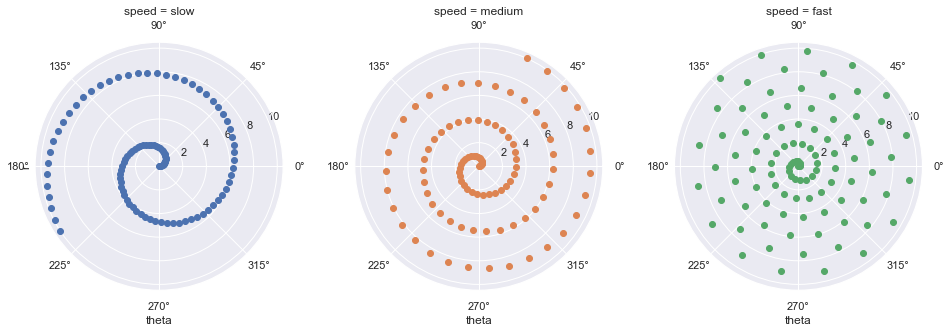

In [35]:
r = np.linspace(0,10,num=100)
df = pd.DataFrame({'r':r,'slow':r,'medium':2*r,'fast':4*r})
df = pd.melt(df,id_vars=['r'],var_name='speed',value_name='theta')
g=sns.FacetGrid(df,col='speed',hue='speed',subplot_kws=dict(projection='polar'),height=4.5,
                sharex=False,sharey=False,despine=False)
g.map(plt.scatter,'theta','r');


In [36]:
df

,r,speed,theta
0,0.00000,slow,0.000000
1,0.10101,slow,0.101010
2,0.20202,slow,0.202020
3,0.30303,slow,0.303030
4,0.40404,slow,0.404040
...,...,...,...
295,9.59596,fast,38.383838
296,9.69697,fast,38.787879
297,9.79798,fast,39.191919
298,9.89899,fast,39.595960


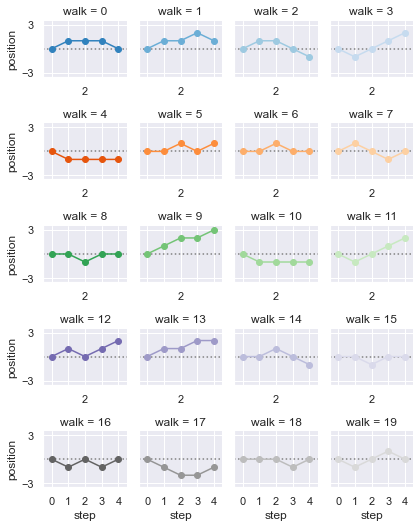

In [37]:
rs = np.random.RandomState(4)
pos=rs.randint(-1,2,(20,5)).cumsum(axis=1)
pos-=pos[:,0,np.newaxis]
step = np.tile(range(5),20)
walk=np.repeat(range(20),5)
df= pd.DataFrame(np.c_[pos.flat,step,walk],columns=['position','step','walk'])
grid=sns.FacetGrid(df,col='walk',hue= 'walk',palette='tab20c',col_wrap=4,height=1.5)
grid.map(plt.axhline,y=0,ls=':',c='.5')
grid.map(plt.plot,'step','position',marker='o')
grid.set(xticks=np.arange(5),yticks=[-3,3],xlim=(-.5,4.5),ylim=(-3.5,3.5))
grid.fig.tight_layout(w_pad=1)

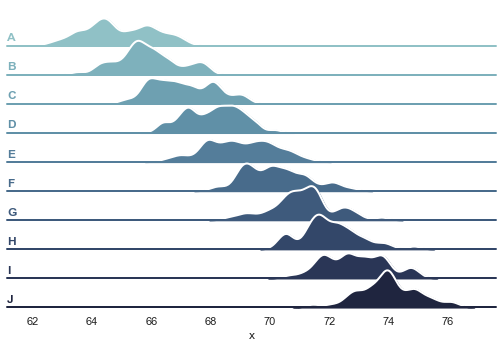

In [38]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
rs = np.random.RandomState(1979)
x = rs.randn(500)
g = np.tile(list("ABCDEFGHIJ"), 50)
df = pd.DataFrame(dict(x=x, g=g))
m = df.g.map(ord)
df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)


g.map(plt.axhline,y=0,lw=2,clip_on=False)
# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

In [39]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


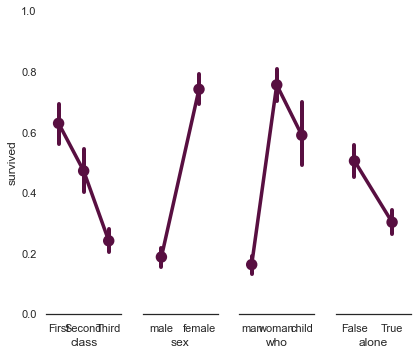

In [40]:
g=sns.PairGrid(titanic,y_vars="survived",x_vars=['class','sex','who','alone'],
               height=5,aspect=.3)
g.map(sns.pointplot,scale=1.3,errwidth=4,color='xkcd:plum')
g.set(ylim=(0,1))
sns.despine(fig=g.fig,left=True)

In [41]:
crashes  = sns.load_dataset('car_crashes')
crashes.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


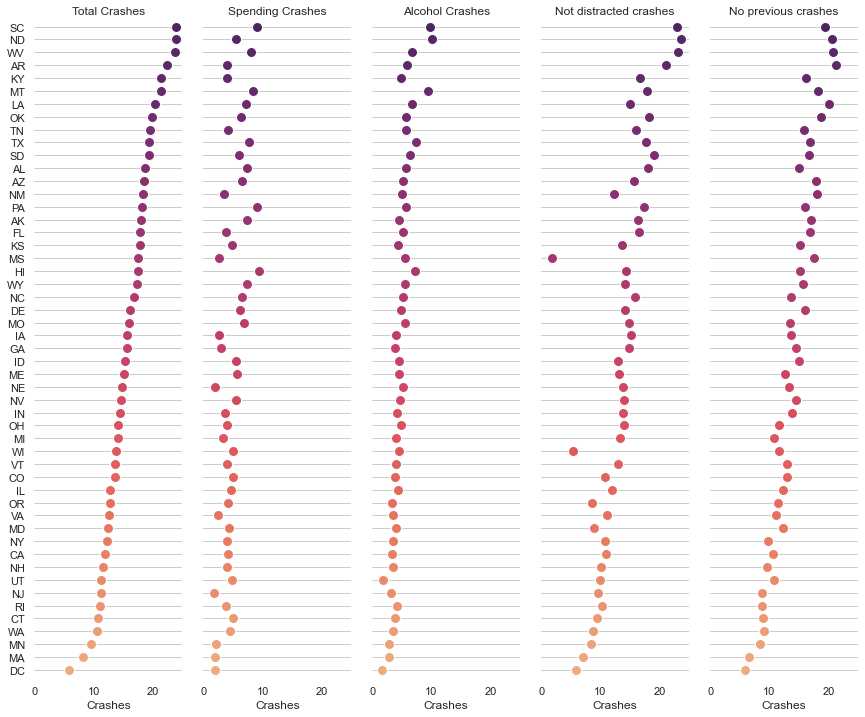

In [42]:
g= sns.PairGrid(crashes.sort_values('total',ascending=False),x_vars=crashes.columns[:-3],
y_vars=['abbrev'],height=10,aspect=.25)

g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

g.set(xlim=(0,25),xlabel="Crashes",ylabel="")
titles =['Total Crashes','Spending Crashes','Alcohol Crashes','Not distracted crashes'
         ,'No previous crashes']
for ax,title in zip(g.axes.flat,titles):
    ax.set(title=title)
    
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True,bottom=True)

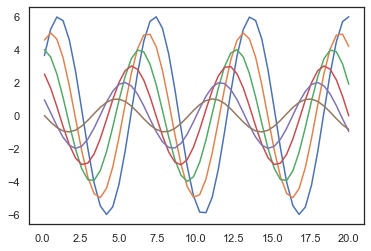

In [43]:
def sinplot(flip=1):
    x=np.linspace(0.15,20)
    for i in range(1,7):
        plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)

sinplot()
sns.set()

<AxesSubplot:>

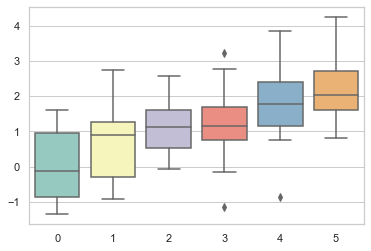

In [44]:
sns.set_style('whitegrid')
data = np.random.normal(size=(20,6))+np.arange(6)/2
sns.boxplot(data=data,palette='Set3')

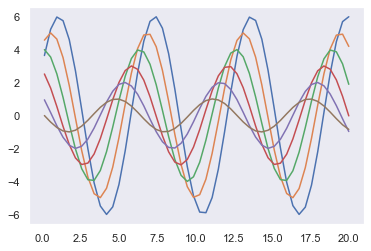

In [45]:
sns.set_style('dark')
sinplot()


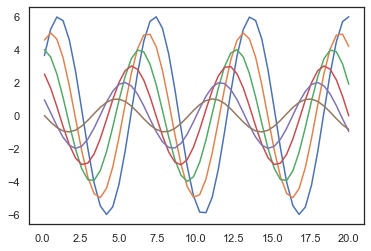

In [46]:
sns.set_style('white')
sinplot()

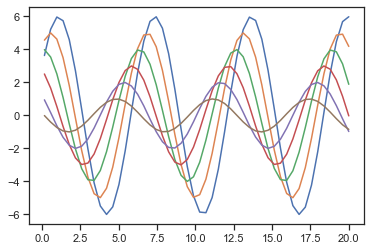

In [47]:
sns.set_style('ticks')
sinplot()

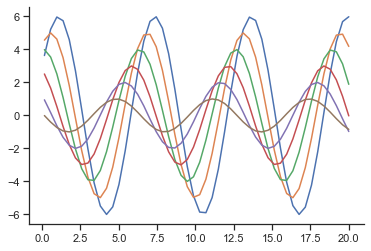

In [48]:
sinplot()
sns.despine()

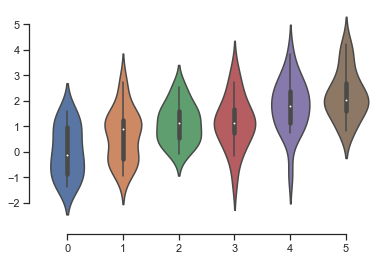

In [49]:
d,ax=plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10,trim=True)

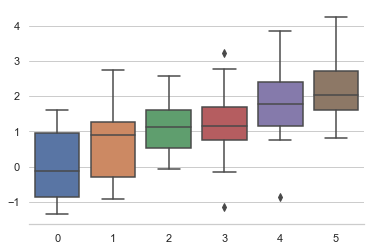

In [50]:
sns.set_style('whitegrid')
sns.boxplot(data=data,palette='deep')
sns.despine(left=True)

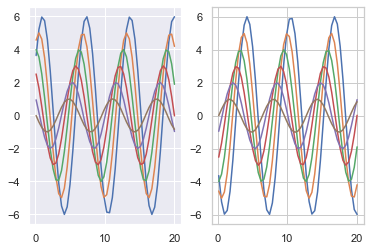

In [51]:
f=plt.figure()
with sns.axes_style('darkgrid'):
    ax=f.add_subplot(1,2,1)
    sinplot()
    
ax=f.add_subplot(1,2,2)  
sinplot(-1)
                    

In [52]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

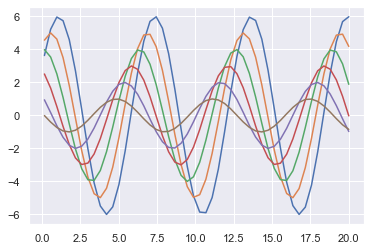

In [53]:
sns.set_style('darkgrid',{'axis.facecolor':'.9'})
sinplot()

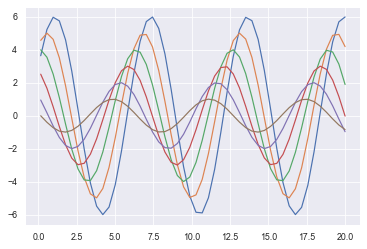

In [54]:
sns.set()
sns.set_context("paper")
sinplot()

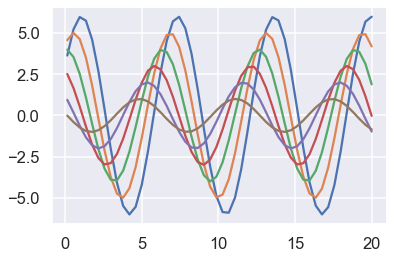

In [55]:
sns.set_context('talk')
sinplot()

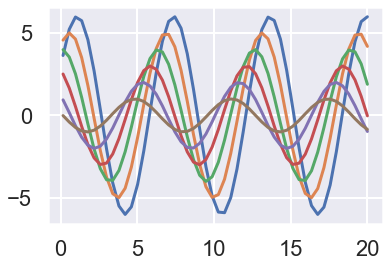

In [56]:
sns.set_context('poster')
sinplot()

In [ ]:
sns.set_context('notebook',font_scale=1.6,rc={'lines.linewith':3})
sinplot()

## color

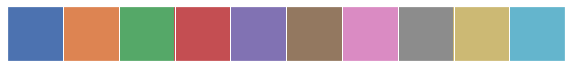

In [59]:
sns.set()
current_palette = sns.color_palette()
sns.palplot(current_palette)

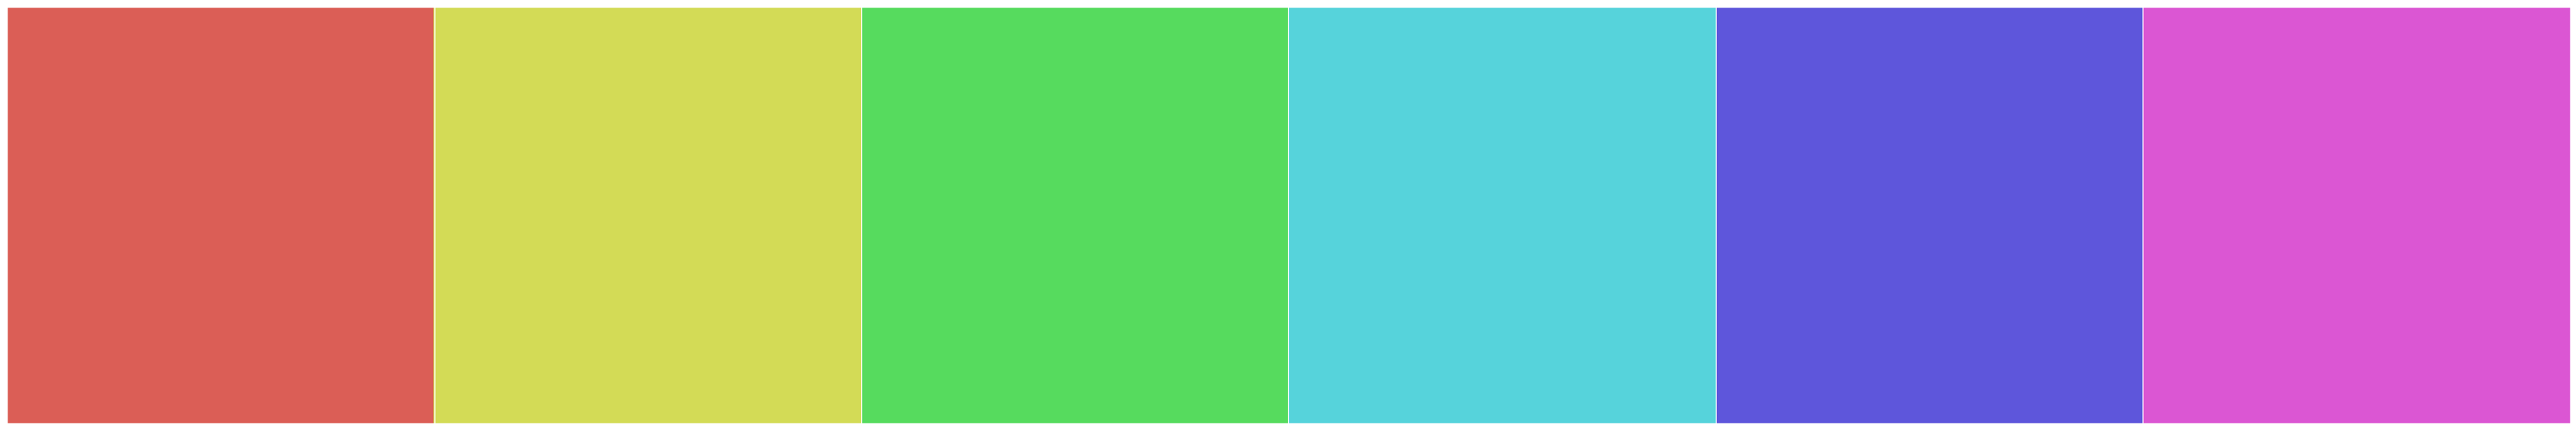

In [60]:
sns.palplot(sns.color_palette('hls'),8)

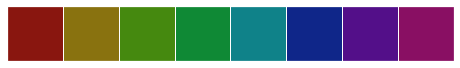

In [61]:
sns.palplot(sns.hls_palette(8,l=0.3,s=.8))

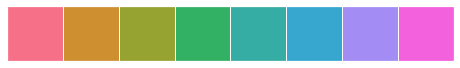

In [64]:
sns.palplot(sns.color_palette('husl',8))

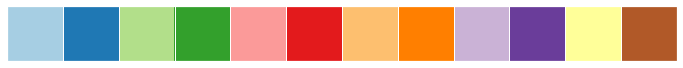

In [66]:
sns.palplot(sns.color_palette('Paired'))

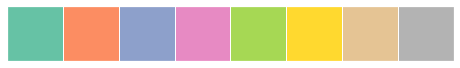

In [67]:
sns.palplot(sns.color_palette('Set2'))

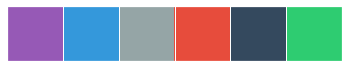

In [70]:
flatui=['#9659b6','#3498db','#95a5a6','#e74c3c','#34495e','#2ecc71']
sns.palplot(sns.color_palette(flatui))

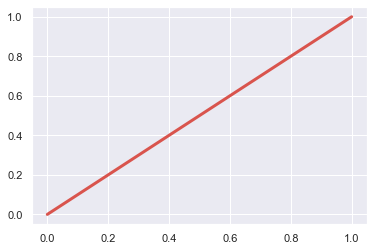

In [73]:
plt.plot([0,1],[0,2],sns.xkcd_rgb['pale red'],lw=3)

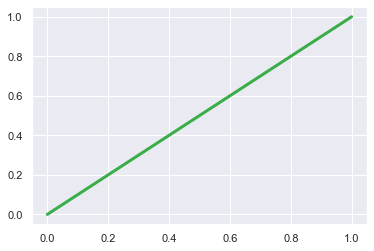

In [74]:
plt.plot([0,1],[0,1],sns.xkcd_rgb['medium green'],lw=3)

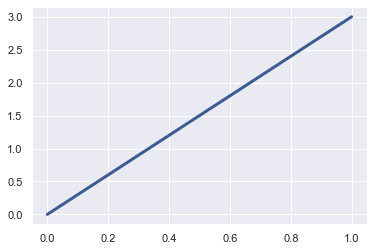

In [75]:
plt.plot([0,1],[0,3],sns.xkcd_rgb['denim blue'],lw=3)

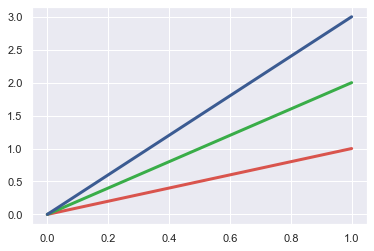

In [76]:
plt.plot([0,1],[0,1],sns.xkcd_rgb['pale red'],lw=3)
plt.plot([0,1],[0,2],sns.xkcd_rgb['medium green'],lw=3)
plt.plot([0,1],[0,3],sns.xkcd_rgb['denim blue'],lw=3)

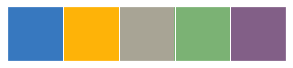

In [77]:
colors=['windows blue','amber','greyish','faded green','dusty purple'] 
sns.palplot(sns.xkcd_palette(colors))

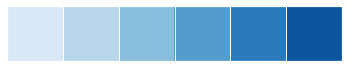

In [80]:
sns.palplot(sns.color_palette('Blues'))


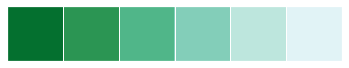

In [81]:
sns.palplot(sns.color_palette('BuGn_r'))

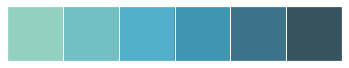

In [84]:
sns.palplot(sns.color_palette('GnBu_d'))

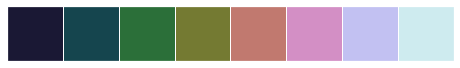

In [85]:
sns.palplot(sns.color_palette('cubehelix',8))

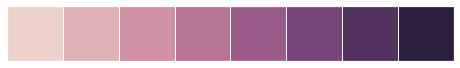

In [87]:
sns.palplot(sns.cubehelix_palette(8))

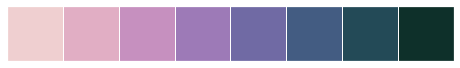

In [88]:
sns.palplot(sns.cubehelix_palette(8,start=5,rot=.75))

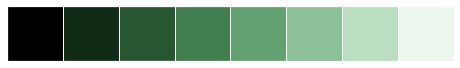

In [90]:
sns.palplot(sns.cubehelix_palette(8,start=2,rot=0,dark=0,light=.95,reverse=True))

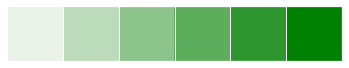

In [91]:
sns.palplot(sns.light_palette('green'))

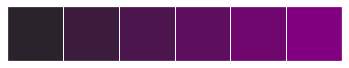

In [93]:
sns.palplot(sns.dark_palette('purple'))

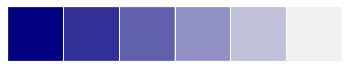

In [94]:
sns.palplot(sns.light_palette('navy',reverse=True))

In [99]:
x,y=np.random.multivariate_normal([0,0],[[1,-.5],[-.5,1]],size=300).T
cmap=sns.cubehelix_palette(light=1,as_cmap=True)

<AxesSubplot:>

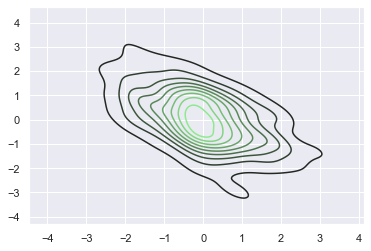

In [100]:
pal = sns.dark_palette('palegreen',as_cmap=True)
sns.kdeplot(x,y,cmap=pal)

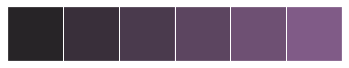

In [103]:
sns.palplot(sns.dark_palette('muted purple',input='xkcd'))

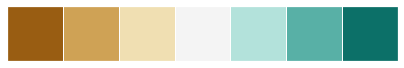

In [105]:
sns.palplot(sns.color_palette('BrBG',7))

In [ ]:
sns.palplot(sns.color_palette('BrBG',7))

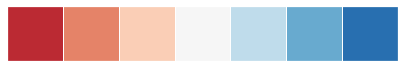

In [106]:
sns.palplot(sns.color_palette('RdBu',7))

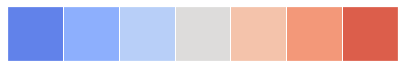

In [107]:
sns.palplot(sns.color_palette('coolwarm',7))

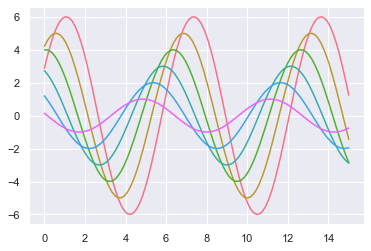

In [110]:
def sinplot(flip=1):
    x=np.linspace(0,15,100)
    for i in range(1,7):
           plt.plot(x,np.sin(x+i*.5)*(7-i)*flip)
            
            
sns.set_palette('husl')   
sinplot()

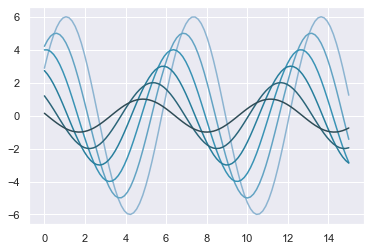

In [111]:
with sns.color_palette('PuBuGn_d'):
    sinplot()
